![images](https://user-images.githubusercontent.com/42184553/55184987-7a4f1400-51a4-11e9-8476-750bd7160da2.png)

#  Investigate in a Movies Dataset
#### Project - Data Analyst Nanodegree
#### Udacity - March 28, 2019
#### Alaa Alaboud - Dhahran - KSA




## Table of Contents
<ul class="outside">
<li><a href="#intro">Introduction</a></li>
<li>
    <a href="#wrangling">Data Wrangling</a>
    <ul class="inside-wran">
        <li><a href="#acquisition">Data acquisition</a></li>
        <li><a href="#cleaning">Data Cleaning</a></li>
    </ul>
</li>
<li><a href="#overview">Overview</a></li>
<li>
    <a href="#eda">Exploratory Data Analysis</a>
        <ul class="inside-explor">
        <li><a href="#part1">Questions-part 1</a></li>
        <li><a href="#part2">Questions-part 2</a></li>
        <li><a href="#part3">Questions-part 3</a></li>    
    </ul>  
</li>
<li>
    <a href="#conclusions">Conclusions</a>
        <ul class="inside-conclu">
        <li><a href="#conclusion1">Conclusion-part 1</a></li>
        <li><a href="#conclusion2">Conclusion-part 2</a></li>
        <li><a href="#conclusion3">Conclusion-part 3</a></li>    
    </ul>     
</li>      
<li><a href="#authored">Authored By</a></li>
</ul>


<a id='intro'></a>
## Introduction

Movies Dataset `tmdb-movies.csv`, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I chose it to explore it in my project to Investigate dataset analysis.

You can see more detail for this dataset in kaggle from this link.

[kaggle - Movies Metadata](https://www.kaggle.com/tmdb/tmdb-movie-metadata)


### We found in kaggle Description for this dataset these notes:

- The columns **budget_adj , revenue_adj** , are in dollar 2010 U.S, and it shows the budget and revenue of the associated movie accounting for inflation over time. but we will drop these columns because we will not be using it in our questions, but we can guess that the budget and revenue columns are in dollar 2010 U.S.

- Some movies in the database have zero budget or zero revenue, that is their value has not been recorded so we will be discarding such entries, and we will treat it as missing values.

- There are some odd characters in the ‘cast’ column. we don't need to clean them. we can leave them as is.

### We will analyze dataset according to these questions:

#### Questions- part 1 (Movies and Genres):
- The most type of genres movie from 1960 to 2015
- genres Trends for the last 5 years
- genres Trends by Generation


#### Questions- part 2 (Animations Movies):
- Is Animation movies trend every year
- The best Animation movie by  Revenue and profits losses



#### Questions- part 3 (Profitable Movies):
- Is Movies production increasing every year
- What are the average runtimes of movies over the years
- What are the average revenues of movies over the years


<a id='wrangling'></a>
## Data Wrangling

<a id='acquisition'></a>
### Data acquisition

First, we need to collect data from this dataset to make our analysis.

We will use some queries and libraries for this.

In [3]:
# Imports Libraries

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [5]:
# Load Dataset

df_tm = pd.read_csv('tmdb-movies.csv')
df_tm.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
# To see the last row in the dataset.
df_tm.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
# get number of columns and rows in this dataset

df_tm.shape

(10866, 21)

In [8]:
# general info
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
#get the types of the entries in each column.
df_tm.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
# To see if there any duplicacy in the rows.

sum(df_tm.duplicated())

1

In [11]:
# general describe
df_tm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
# To see is there any unique values in a dataset.

sum(df_tm.nunique())

119205

In [13]:
type(df_tm)

pandas.core.frame.DataFrame

<a id='overview'></a>
## Overview

After we discovered this dataset we found that is actually cleaned from original data on Kaggle, but there is some data need to cleaning according to our questions.

### <a href="#change">CHANGE</a>

**Data Type:**

we need to Changing format of budget and revenue and release date column


- budget (int64 ==> float)

- revenue (int64 ==> float)

- Replacing zero values with null values in the **budget** and **revenue** columns.

- Removing zero values with null values in **runtime**.


### <a href="#remove">REMOVE</a>


- Removing the duplicacy in the rows.

- Removing unused column: **(imdb_id, keywords, homepage, overview, release_date, tagline, vote_count, cast, director, production_companies.)**.

- Removing null values that with a small number of nulls: **genres**.


 

### <a href="#add">ADD</a>

- **‘genres’** column, contain multiple values separated by pipe(|) characters, we will use pandas functions(cat,split) to separated to can read it in our analysis.

- We will create a column to categorize the films by type if it is an animated or not.
- We will create a column to for profits losses for the movies.


<a id='cleaning'></a>
### Data Cleaning

<a id='remove'></a>
### REMOVE

#### Removing Duplicated Rows

In our discovered above, we found one duplicate row, we can show that rows using this method.

In [14]:
df_tm[df_tm.duplicated(['id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


we want now clearing this dataset from duplicate rows.

In [15]:
#drop duplicates
df_tm.drop_duplicates(inplace=True)

Now we want to make sure that dataset is cleaned , when we run this code it should get 0 result

In [16]:
# check for duplicates in the data
sum(df_tm.duplicated())

0

#### Removing Unused columns

After we set our questions, we found these columns is unused, so we decided to drop them.

Columns that we need to delete are :
    
imdb_id, keywords, homepage, overview, release_date, tagline, vote_count, budget_adj, revenue_adj, cast, director, production_companies.

In [17]:
# get all columns
df_tm.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [18]:
# drop coulmns unused
df_tm.drop(['imdb_id', 'cast', 'director', 'keywords', 'homepage', 'overview', 'tagline', 'production_companies' , 'release_date', 'vote_count', 'budget_adj', 'revenue_adj', 'cast', 'director', 'production_companies'], axis=1, inplace=True)

df_tm.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015


To make sure we drop unused columns we run this method again.

In [19]:
#show columns
df_tm.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'vote_average', 'release_year'],
      dtype='object')

#### Removing NAN values

Now we will remove null values that with a small number of nulls like (genres).
here, we decide to drop nulls values because this column is string not number to fill it with the mean.

In [20]:
# check null values
df_tm.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

In [21]:
#drop null values from genres column
col_nan = ['genres']
df_tm.dropna(subset = col_nan, how='any', inplace=True)

here, we want to check null values, to make sure the dropped has done, should returning 0 in genres column.

In [22]:
# check null values, should return 0 in genres column
df_tm.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

<a id='change'></a>
### CHANGE

#### Changing format of budget and revenue columns

We found that two columns type is int64, but the values in the dataset were float number, so we will convert the type to float.

In [23]:
# convert the types
chg_type = ['budget', 'revenue']

df_tm[chg_type] = df_tm[chg_type].applymap(np.float)

In [24]:
#print data type
df_tm.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
runtime             int64
genres             object
vote_average      float64
release_year        int64
dtype: object

#### Replacing zero with NAN

we will count the zeros value in budget, revenue datafram. and as we mentioned before that values have not been recorded so we will be discarding such entries, and we will treating it as missing values.

#### budget & revenue columns

In [25]:
# count 0s values in column budget
budget_0s = df_tm.groupby('budget').count()['id']

budget_0s.head(2)

budget
0.0    5674
1.0       4
Name: id, dtype: int64

In [26]:
# count 0s values in column revenue
revenue_0s = df_tm.groupby('revenue').count()['id']

revenue_0s.head(2)

revenue
0.0    5993
2.0       2
Name: id, dtype: int64

As you see, we found a lot of 0s value, and that why we can't drop it and lose a lot of rows in our dataset.

In [27]:
#replaceing zeros values with null
df_tm['budget'] = df_tm['budget'].replace(0, np.NaN)
df_tm['revenue'] = df_tm['revenue'].replace(0, np.NaN)

In [28]:
#check if replacement is done
budget_0s = df_tm.groupby('budget').count()['id']

budget_0s.head(2)

budget
1.0    4
2.0    1
Name: id, dtype: int64

In [29]:
#check if replacement is done
revenue_0s = df_tm.groupby('revenue').count()['id']

revenue_0s.head(2)

revenue
2.0    2
3.0    3
Name: id, dtype: int64

#### runtime column

I will see the min and max values for the runtime of moves.

In [30]:
df_tm['runtime'].describe()

count    10842.000000
mean       102.138443
std         31.294612
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

As we see, from this we have "2.000000" as min value, and "900.000000" as max value, the difference between these two values is big so we will not use the mean values to fill the 0s.

In [31]:
# count 0s values in column
runtime_0s = df_tm.groupby('runtime').count()['id']

runtime_0s.head(2)

runtime
0    30
2     4
Name: id, dtype: int64

In **runtime** there are a few 0s values "30", so I decide to replace 0s with null also.

In [32]:
#replaceing zeros values with null
df_tm['runtime'] = df_tm['runtime'].replace(0, np.NaN)

In [33]:
runtime_0s = df_tm.groupby('runtime').count()['id']

runtime_0s.head(2)

runtime
2.0     4
3.0    10
Name: id, dtype: int64

In [31]:
#check if replacement is done
df_tm.isnull().sum()

id                   0
popularity           0
budget            5674
revenue           5993
original_title       0
runtime             30
genres               0
vote_average         0
release_year         0
dtype: int64

<a id='add'></a>
### ADD

#### Create a column for Type to categorize the films by type

We will create a column to categorize the films by type, if it is an animated or not.

In [34]:
# create column animation and search if genres col has a string "Animation" and chose it.
df_tm['animation'] = df_tm.genres.str.contains('Animation')

# I used Map for substituting each "Animation" value in a "genres" column with " yes" if it's there and " No " if not. 
df_tm['animation'] = df_tm['animation'].map({True: 'Yes', False: 'No'})
        
df_tm.head(12)  

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year,animation
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015,No
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,7.1,2015,No
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,6.3,2015,No
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015,No
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,7.3,2015,No
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,156.0,Western|Drama|Adventure|Thriller,7.2,2015,No
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,125.0,Science Fiction|Action|Thriller|Adventure,5.8,2015,No
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,141.0,Drama|Adventure|Science Fiction,7.6,2015,No
8,211672,7.404165,74000000.0,1.156731e+09,Minions,91.0,Family|Animation|Adventure|Comedy,6.5,2015,Yes
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,94.0,Comedy|Animation|Family,8.0,2015,Yes


In [35]:
#check if the column has two value type
df_tm.animation.unique()

array(['No', 'Yes'], dtype=object)

In [36]:
# head of the new column values.
df_tm.animation.head(12) 

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8     Yes
9     Yes
10     No
11     No
Name: animation, dtype: object

#### Create a column for profits losses for the movies

we decided to create a new column for profits losses for the movies, we can get it by subtracting the revenue column from the budget column.
For using it to analyze the real profit for movies.

In [37]:
# insert a column for the profit losses value of each movie
df_tm.insert(4, 'profits_losses', df_tm['revenue'] - df_tm['budget'])
df_tm.head()

,id,popularity,budget,revenue,profits_losses,original_title,runtime,genres,vote_average,release_year,animation
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015,No
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,7.1,2015,No
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,6.3,2015,No
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015,No
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,137.0,Action|Crime|Thriller,7.3,2015,No


In [38]:
# get all columns after add animation and profits_losses columns
df_tm.columns

Index(['id', 'popularity', 'budget', 'revenue', 'profits_losses',
       'original_title', 'runtime', 'genres', 'vote_average', 'release_year',
       'animation'],
      dtype='object')

In [39]:
# check columns and rows count in dataset
df_tm.shape

(10842, 11)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='part1'></a>
### Questions Part 1

### Q 1:
### The most type of genres movie from 1960 to 2015?

#### Separate the strings entries in column

First, we need to separate the strings entries in columns by pipe characters '|', we have one column "genres ".

In [40]:
# A function which will take a column, and separate the string by pipe characters '|'

def valu_sprt(genres):
    
    # giving pandas series to make it a list and storing the values separately
    valu_sprt = df_tm['genres'].str.cat(sep = '|')
    
    valu_sprt = pd.Series(valu_sprt.split('|'))
    
    top_val = pd.DataFrame({'top' :valu_sprt})
    
    # ascending: I make it False to sort list values orders, to get the top values.
    count_all = valu_sprt.value_counts(ascending = False)
    
    return count_all

In [41]:
#variable to store the retured value
count_all = valu_sprt('genres')
#printing top 5 values
count_all.head()

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64

#### A pie visualization for all genres type

here we can see the values and the percentage count of all genres type as a pie visualization.
we can find from this the most and fewer types of movies are released from 1960 to 2015 years in this dataset.

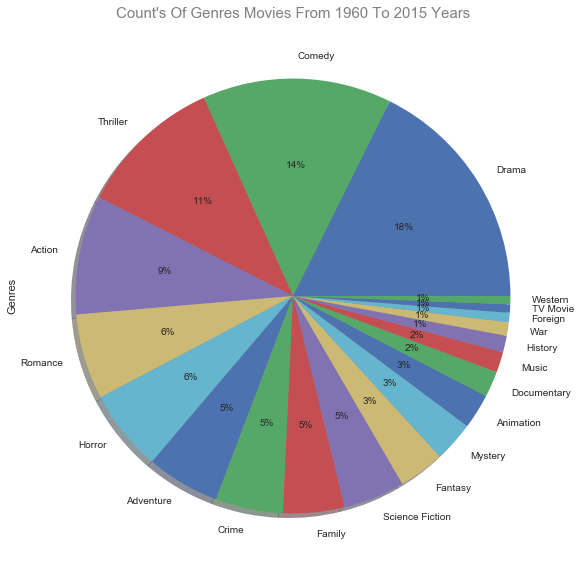

In [107]:
# Plot the pie visualization for all genres type

count_all.plot(kind='pie', label='Genres' ,figsize=(10, 10), autopct='%1.0f%%', shadow=True)

plt.title(label="Count's Of Genres Movies From 1960 To 2015 Years" , fontsize=15, color='grey')

# save
plt.savefig('Genres_Movies.png', dpi=70, bbox_inches='tight');

We can see there are 5 types presenting as 1%, and two types as 2%, and three types as 3%, and 4 types as 5%, two types as 6%, then there is a four type got the high score sored like this:

**Action** 9%, **Thriller** 11%, **comedy** 14% and in the top **Drama** with 18% from this dataset.  

### Q 2:
### genres Trends for the last 5 years?

To get the trends of the genre for the last 5 years, first, I need to sort the years by the **numpy** function **"sort"** then stored in a variable for can use it.

In [43]:
# sort release year list.
year_unq= df_tm.release_year.unique()
year_unq= np.sort(year_unq)
year_unq

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

Now we will make variables for each of the last 5 years by **List slicing** python method.

In [44]:
# var for 2015
yer_15 = year_unq[-1:]
print(yer_15)
# var for 2014
yer_14 = year_unq[-2:-1]
print(yer_14)
# var for 2013
yer_13 = year_unq[-3:-2]
print(yer_13)
# var for 2012
yer_12 = year_unq[-4:-3]
print(yer_12)
# var for 2011
yer_11 = year_unq[-5:-4]
print(yer_11)


[2015]
[2014]
[2013]
[2012]
[2011]


we need to use the same procedure from last first question, to separate the string by pipe characters '|' in the genres column.to get each type of genres and to see the top type in each year.

In [45]:
# A function which will take a column, and separate the string by pipe characters '|'

def valu_gen(genres, num=5):
    
    # giving pandas series to make it a list and storing the values separately
    valu_gen = genres.str.cat(sep = '|')
    
    valu_gen = pd.Series(valu_gen.split('|'))
    
    top_val = pd.DataFrame({'top' :valu_gen})
    
    # ascending: I make it False to sort list values orders, to get the top values.
    count_ = top_val['top'].value_counts(ascending = False).head(num)
    
    return count_

here we want to make a new DataFrame and store the values we want, after applying a for a loop. to get the top type in the year and the count of movies released in the same type.

In [46]:
# store the lists in a variable.
five_y = [yer_15, yer_14, yer_13, yer_12, yer_11]

#get names for the generations.
names = ['2015', '2014', '2013', '2012', '2011']

#create an empty dataframe, with index = 0
five_y_ = pd.DataFrame()
index = 0

# using for loop to check in every year and sort it in a generation.
for i in five_y:
    # i used Series.isin to Check whether values are contained in Series or not.
    yer_in = df_tm[df_tm.release_year.isin(i)]
    # fill the data frame, a year with generation name and top with the count of the top type.
    rslt_y5 = pd.DataFrame({'year' : names[index],'top': valu_gen(yer_in.genres,1)})
    # I'm using append to adding the result to the new dataframe as columns.
    five_y_ = five_y_.append(rslt_y5)
    index +=1
five_y_

,year,top
Drama,2015,260
Drama,2014,284
Drama,2013,253
Drama,2012,232
Drama,2011,214


#### A bar visualization for the last new dataframe for last 5 years

make a bar chart to see the visualization for the last 5 years, and we can found also the most year in released movies.

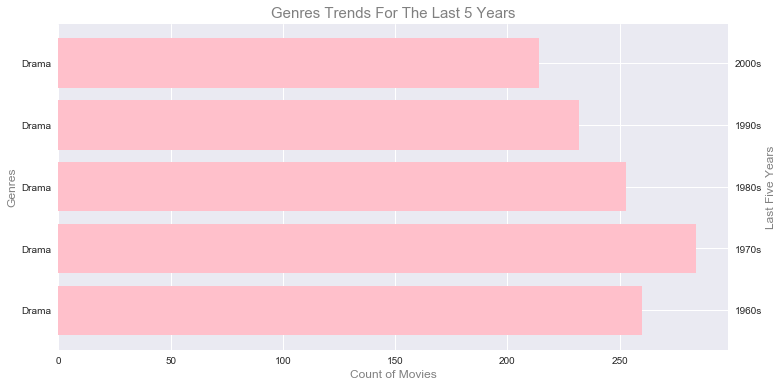

In [103]:
# Setting the positions
year5_list = five_y_.index
positn_y = np.arange(len(names))


#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Genres Trends For The Last 5 Years', fontsize=15, color='grey');


# set y1 , y2  to present the left and right side of y axis labels as genres number
y1 = five_y_.top
y2 = five_y_.top


#plot the bar left side y ticks position, label
ax.barh(positn_y, y1)
ax.set_yticks(positn_y)
ax.set_yticklabels(year5_list)
#Add a title,font size, color of for left side y label
ax.set_ylabel('Genres',fontsize=12, color='grey')
#Add a title,font size, color of for left side x label
ax.set_xlabel('Count of Movies',fontsize=12, color='grey')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()

#plot the bar right side y ticks position, label
ax2.barh(positn_y, y2, color='pink')
ax2.set_yticks(positn_y)
ax2.set_yticklabels(names)
#Add a title,font size, color of for right side y label
ax2.set_ylabel('Last Five Years',fontsize=12, color='grey')

# save
plt.savefig('Genres_Trends_Five_Years', dpi=70, bbox_inches='tight');

We can figure from this bar chart the Drama type is in the top for the five years ,  and the released movies are in growth every year, and we found the 2014 year is the most year in released movies with above 260 movies.

### Q 3:
### genres Trends by Generation?

We will calculate the generation from **1960** to **2009** , and I will drop 6 years after 2009 to 2015 from this investigation because we don't have the data for the last **4** years to complete a generation.

We will make five lists for every generation by this condition, using **List slicing** python method.

In [48]:
# make lists to stored years

# from 1960 to 1969
y60s =year_unq[:10]
print(y60s)

# from 1970 to 1979
y70s =year_unq[10:20]
print(y70s)

# from 1980 to 1989
y80s =year_unq[20:30]
print(y80s)

# from 1990 to 1999
y90s = year_unq[30:40]
print(y90s)

# from 2000 to 2009
y2000s = year_unq[40:50]
print(y2000s)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969]
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979]
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]


As the same of the last question, we want to make a new DataFrame and store the values we want, after applying a for a loop. to get the top type in every generation and the count of movies released in the same type.

In [49]:
# store the lists in a variable.
genr = [y60s, y70s, y80s, y90s, y2000s]

#get names for the generations.
names = ['1960s', '1970s', '1980s', '1990s', '2000s']

#create an empty dataframe, with index = 0
gen_ = pd.DataFrame()
index = 0

# using for loop to check in every year and sort it in a generation.
for i in genr:
    # i used Series.isin to Check whether values are contained in Series or not.
    yer_in = df_tm[df_tm.release_year.isin(i)]
    # fill the data frame, a year with generation name and top with the count of the top type.
    rslt_gen = pd.DataFrame({'year' : names[index],'top': valu_gen(yer_in.genres,1)})
    # I'm using append to adding the result to the new dataframe as columns.
    gen_ = gen_.append(rslt_gen)
    index +=1
gen_

,year,top
Drama,1960s,168
Drama,1970s,239
Comedy,1980s,428
Drama,1990s,862
Drama,2000s,1615


#### A bar visualization for the last new dataframe for all generations

make a bar chart to see the visualization for all generations, and we can found also the most generation in released movies, and if the released movies are growth by every generation or not.

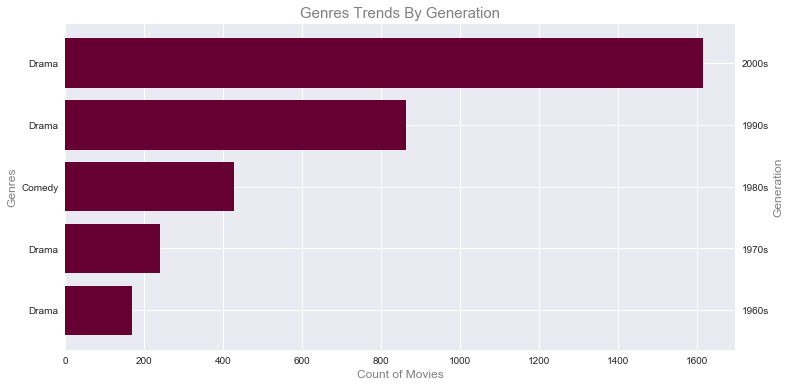

In [104]:
# Setting the positions
genres_list = gen_.index
positn_y = np.arange(len(names))


#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Genres Trends By Generation', fontsize=15, color='grey');


# set y1 , y2  to present the left and right side of y axis labels as genres number
y1 = gen_.top
y2 = gen_.top


#plot the bar left side y ticks position, label
ax.barh(positn_y, y1)
ax.set_yticks(positn_y)
ax.set_yticklabels(genres_list)
#Add a title,font size, color of for left side y label
ax.set_ylabel('Genres',fontsize=12, color='grey')
#Add a title,font size, color of for left side x label
ax.set_xlabel('Count of Movies',fontsize=12, color='grey')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()

#plot the bar right side y ticks position, label
ax2.barh(positn_y, y2 , color='#660033')
ax2.set_yticks(positn_y)
ax2.set_yticklabels(names)
#Add a title,font size, color of for right side y label
ax2.set_ylabel('Generation',fontsize=12, color='grey')


# save
plt.savefig('Genres_Trends_Generation', dpi=70, bbox_inches='tight');

You can figure from this bar chart the Drama type is in the top for all generations except the 80s, and the released movies are in growth by time, and we found the 2000s have the most in released movies with approximately the doubled than the past generations.

<a id='conclusion1'></a>
### Conclusions Part 1:

We found in this anlaysis part:

- The movies released are increased from 1960 to 2015 years. 

- As you can see from a pie chart in our first question in this part, the Drama at the top and got 18% by all dataset, and in the second place the Comedy with 14 %, then Thriller with 11%.and in the last place, from released movies, we have western, War, History with 1 %. 

- And for the last five years the Drama also in the top with increased from 2011 to 2014, and 2014 got the top year in released with 284, then it's got a little back in 2015 with a difference 24 movies.


- And we also have seen in the five last generations the Drama in the top also, with increased, and in 2000s movies production doubled from the 90s with 1615 movies, but the 80s, the comedy movies suddenly got released more and being in the top.

when I searched for the reason, I found that,The handful of comedy clubs that opened in the '70s had flourished on both coasts. 
In the '80s, clubs went national; between 1978 and 1988, over 300 comedy clubs sprung up across the U.S. Stand-up comedy was everywhere. and a large number of comedians became popular in the '80s and found large audiences.


### prediction

We can predict that in the next years, Drama production will increase also if still got an audiences.

<a id='part2'></a>
### Questions Part 2

### Q 1:
### Is Animation movies trend every year?

#### Describe the count of the movies if is animated or not

From the describe function for the animation column and a bar chart visualization, we can see the rating and count for movies by animated.

In [51]:
# view describe for animation column by release years
df_tm.groupby('animation').release_year.describe()

,count,mean,std,min,25%,50%,75%,max
animation,,,,,,,,
No,10143.0,2001.130040,12.934103,1960.0,1994.0,2005.0,2011.0,2015.0
Yes,699.0,2003.995708,10.566679,1961.0,2000.0,2007.0,2011.0,2015.0


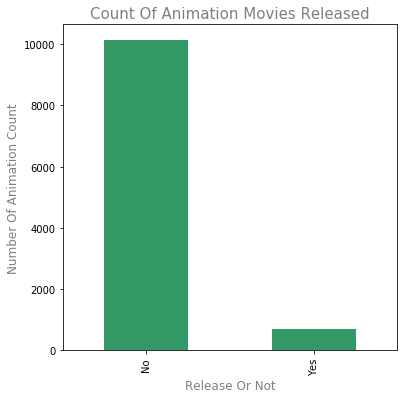

In [52]:
# plot chart line for animation column by value count
df_tm.animation.value_counts().plot(kind='bar', figsize=(6,6), color='#339966')

# Add a title of chart and for x, y labels
plt.title("Count Of Animation Movies Released", fontsize=15, color='grey')
plt.xlabel("Release Or Not" ,fontsize=12, color='grey')
plt.ylabel("Number Of Animation Count" ,fontsize=12, color='grey');

# save
plt.savefig('Count_Animation_Movies', dpi=70, bbox_inches='tight');

From this table and the bar chart, we can see that we have 699 animation movies and 10143 movies are not.

#### A histogram visualization for the count of the releasing animation movies

For answering our question, Is Animation movies trend up every year? we will make a histogram visualization for this.

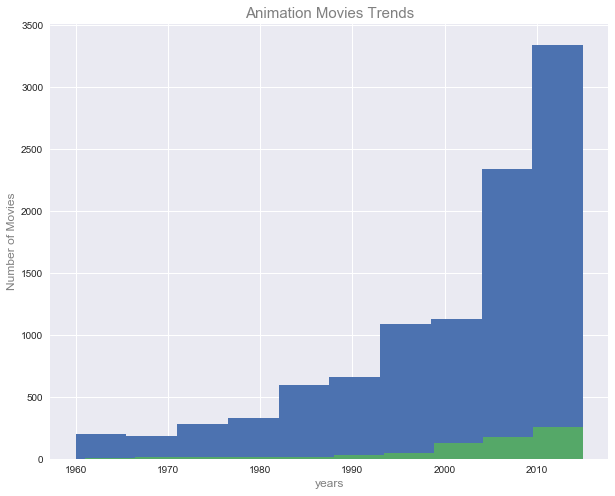

In [98]:
# plot chart line for animation column by release_year
df_tm.groupby('animation').release_year.plot.hist(figsize=(10, 8))

# Add a title of chart and for y label
plt.title(label='Animation Movies Trends' , fontsize=15, color='grey')
plt.ylabel('Number of Movies',fontsize=12, color='grey')
plt.xlabel('years',fontsize=12, color='grey')


# save
plt.savefig('Animation_Movies_Trends', dpi=70, bbox_inches='tight');

we can figure from this the trend for releasing animation movies from the 60s to the last of the 80s are not getting up a lot, then in the last, the 90s is growth more until the 2010 year, then again its growth up to the 2015 year. in general, the correlation is positive. 

### Q 2:
### The best Animation movie by  Revenue and profits losses ?

we want to make the table by **query** function to sort movies by animated, then by revenue and profits losses to get the best movies.

#### Table 1 Animation BY Profits losses

In [54]:
# list of columns want to viewed
col = ['original_title','budget','revenue', 'profits_losses','animation', 'release_year']

# i used query to show movies which is animation, and i used sort_values to sorted according to the profit_loss column
# i used ascending = False to sorted from max value
anmyi = df_tm.query('animation=="Yes"')[col].sort_values('profits_losses', ascending = False).head(3)
anmyi

,original_title,budget,revenue,profits_losses,animation,release_year
5422,Frozen,150000000.0,1.274219e+09,1.124219e+09,Yes,2013
8,Minions,74000000.0,1.156731e+09,1.082731e+09,Yes,2015
5434,Despicable Me 2,76000000.0,9.707619e+08,8.947619e+08,Yes,2013


The best movie from this table is **Frozen** movie.

#### Table 2 Animation BY Revenue

In [55]:
# sorted by revenue column
anmyi_2 = df_tm.query('animation=="Yes"')[col].sort_values('revenue', ascending = False).head(3)
anmyi_2

,original_title,budget,revenue,profits_losses,animation,release_year
5422,Frozen,150000000.0,1.274219e+09,1.124219e+09,Yes,2013
8,Minions,74000000.0,1.156731e+09,1.082731e+09,Yes,2015
1930,Toy Story 3,200000000.0,1.063172e+09,8.631719e+08,Yes,2010


The best movie from this table also is **Frozen** movie.

<a id='conclusion2'></a>
### Conclusions Part 2:

- Through the histogram chart, we can see that the production of animation movies has increased more than ever especially from 2000 to 2015 years and that the overall rate is increasing every year. also, we can see from the bar chart that the animated movies in this dataset are a little.

- And from the two sub-dataset we can figure the best Animation movie according to Revenue and profits.

- The "**Frozen**" movie in the top with **1.274219e+09** revenue and **1.124219e+09** profits losses and was released in the **2013** year.

- And in the second place the "**Minions**" movie with **1.156731e+09** revenue  and **1.082731e+09** profits losses and was released in the **2015** year.

#### prediction

We can predict that in the next years, Animation movies production will increase.

<a id='part3'></a>
### Questions Part 3

### Q1:
### Is Movies production increasing every year?

we will create a new variable to store the count of released movies every year.

In [56]:
# count the number of movies released in each year sort it by id coulmn
movi_num = df_tm.groupby('release_year').count()['id']
movi_num.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

#### A line chart visualization for the number of released movies.

We will visualize the number of movies to find the trend of movies released, to figure out the production rate.

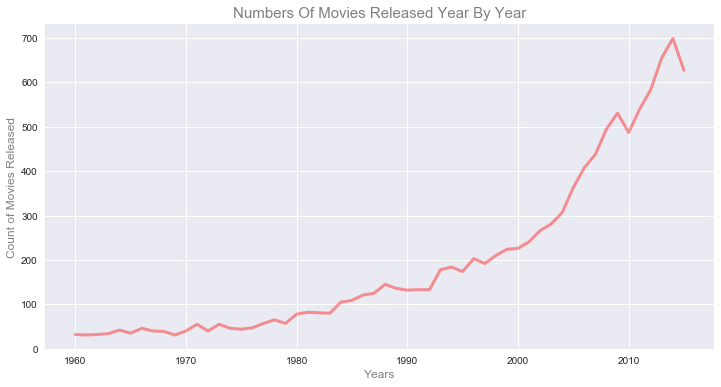

In [57]:
# set seaborn style
plt.style.use('seaborn')

# movies released years
x = movi_num.index
# count of movies released
y = movi_num

# set figure size
plt.figure(figsize=(12, 6))
# plot line chart 
plt.plot(x, y, color = 'red', linewidth=3, alpha=0.4)
      
# Add a title of chart  and for x, y labels
plt.title(label='Numbers Of Movies Released Year By Year' , fontsize=15, color='grey')
plt.xlabel('Years', fontsize=12, color='grey')
plt.ylabel('Count of Movies Released', fontsize=12, color='grey');
     
# save
plt.savefig('Movie_Released_years.png', dpi=70, bbox_inches='tight')

From the chart, we can see it's trending up every year.

### Q2:
### What are the average runtimes of movies over the years?

we will get the mean of the duration for the movies.

In [58]:
# view describe for runtime column
df_tm['runtime'].describe()

count    10812.000000
mean       102.421846
std         30.871363
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

#### A line chart visualization for the average of runtime movies.

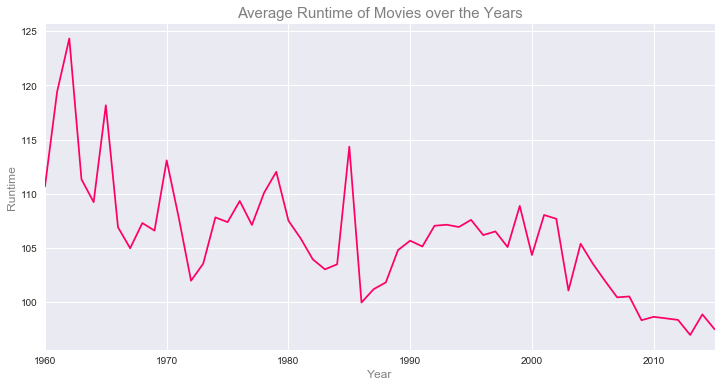

In [59]:
# plot chart line for release year and runtime columns
df_tm.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (12, 6), color = '#ff0066')

# Add a title of chart and for x, y labels
plt.title('Average Runtime of Movies over the Years', fontsize=15, color='grey')
plt.xlabel('Year', fontsize=12, color='grey')
plt.ylabel('Runtime', fontsize=12, color='grey');

# save
plt.savefig('Average_Runtime_In_Years', dpi=70, bbox_inches='tight');

From the line chart of Average Runtime, The runtime of movies has decreased year by year. 

### Q3:
### What are the average revenues of movies over the years?

We will get the mean of the revenues for the movies, by the pandas mean function.

In [60]:
# view describe for runtime column
df_tm['revenue'].describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

#### A line chart visualization for the average of revenues of movies.

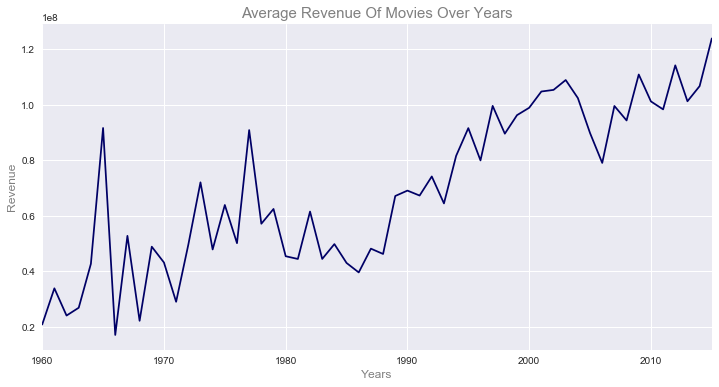

In [61]:
# plot chart line for release year and revenue columns
df_tm.groupby('release_year')['revenue'].mean().plot(kind='line', figsize = (12, 6), color = '#000066')

# Add a title of chart and for x, y labels
plt.title('Average Revenue Of Movies Over Years', fontsize=15, color='grey')
plt.xlabel('Years', fontsize=12, color='grey')
plt.ylabel('Revenue', fontsize=12, color='grey');

# save
plt.savefig('Average_Revenue_In_Years', dpi=70, bbox_inches='tight');

From the line chart of Average revenues, The revenue of movies has increased year by year. 

<a id='conclusion3'></a>
### Conclusions Part 3:

- From the chart line of Movies Released, We can see that the number of movies released in the 60s and the70s is slightly increased, then after the 80s, is getting more high increased year by year. 

- And From the line chart of Average Runtime, The runtime of movies has decreased since 1960 to 2015 with up and down rating over the years.
- Movies tend to last around 90-112 minutes. and Presently, it seems g to move down less than 100 minutes in since the lasts of 2000 years to the 2015 year.


#### prediction

We can predict that in the next years, movies production will increase.

<a id='conclusions'></a>
## Final Conclusion


From the Conclusions in prevue parts, we can figure out that:
1. Movies production is increased every year.
2. It seems that the revenue generated by the production of movies is increasing every year, with a decrease in the duration of the runtime of the movies.
3. The interested and production of animation and movies is increasing over the years.
4. The best animation movie by revenue and profits losses is "**Frozen**" and was released in the **2013** year. 
5. The Drama movies at the top in released movies and get 18% from all dataset.
6. seems the people like dramas more since the last 5 generations, and I think also in the forward generation too.  
7. Comedy comes in second place with 14 % and was at the top and most released movies in the 80s.
8. And for the last five years, the Drama was in the top with increased from 2011 to 2014. 
9. The 2014 year got the top year in released with 284, then it's got a little back in 2015 with a difference 24 movies.
10. The Average Runtime of movies has decreased since 1960 to 2015 with up and down rating over the years.
11. Movies tend to last around 90-112 minutes. 
12. In Presently, it seems g to move down less than 100 minutes in since the lasts of 2000 years to the 2015 year.

In general, interest in movies seems increasing every year, with more revenue.


### Limitations

I want to say that The above conclusion is not 100% formula to success in our analysis.

1. We have used for our investigate analysis the  TMBD Movies dataset and have worked with genres, release year, popularity, revenue, budget, and runtime columns.

2. Our analysis is limited to only provided dataset. For example, the dataset does not confirm the average revenues of movies over the years, because we have a lot of missing value in the revenue column. 

3. There is no normalization or exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

4. we found In genres column a missing value. so in our data wrangling cleaning, we decided to drop null values. but dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed.

5. There are fields are filled out by users so don't expect them to agree on, genres or ratings.

## References

https://www.thoughtco.com/stand-up-comedy-in-the-1980s-801533

<a id='authored'></a>
## Authored By:

Alaa Adil Alaboud - Saudi Arabia

[GitHub-Alaa-1989](https://github.com/Alaa-1989)

[LinkedIn-alaa-alaboud](https://www.linkedin.com/in/alaa-alaboud/)